In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

C:\Users\Gautam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data=pd.read_csv("mnist_train.csv")
testdata=pd.read_csv("mnist_test.csv")

In [3]:
data.head()
data.shape

(60000, 785)

In [4]:
Xdata=data.iloc[:,1:].values
yold=data.iloc[:,0].values
yold

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [16]:
enc=OneHotEncoder()

It is important to OneHot Encode the dataset for classification problems. The softmax with cross entropy function will not work properly otherwise.

In [6]:
y2=yold.reshape(-1,1)
print(y2)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [7]:
ydata=enc.fit_transform(y2).toarray()
print(ydata)
print(ydata.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


I added the MNIST dataset.

X has 784 columns indicating pixel values for an image of (28,28) size.
y is one hot encoded and has 10 columns. 0 has the value (1 0 0 0 0 0 0 0 0 0)

In [8]:
n_classes=10
nodes_hl1=600
nodes_hl2=500
nodes_hl3=500
X=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,n_classes])

In [9]:
W1=tf.Variable(tf.truncated_normal([784,nodes_hl1]))
b1=tf.Variable(tf.random_normal([nodes_hl1]))
y1=tf.nn.sigmoid(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.truncated_normal([nodes_hl1,nodes_hl2]))
b2=tf.Variable(tf.random_normal([nodes_hl2]))
y2=tf.nn.sigmoid(tf.matmul(y1,W2)+b2)

W3=tf.Variable(tf.truncated_normal([nodes_hl2,nodes_hl3]))
b3=tf.Variable(tf.random_normal([nodes_hl3]))
y3=tf.nn.sigmoid(tf.matmul(y2,W3)+b3)

W0=tf.Variable(tf.truncated_normal([nodes_hl3,n_classes]))
b0=tf.Variable(tf.random_normal([n_classes]))

final_weights=tf.matmul(y3,W0)+b0

Created the architecture for the Neural Network. 3 hidden layers with 600 and 500 and 500 nodes.
Now we will train the model using an optimizer.

In [17]:
error=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=final_weights, labels=y))

In [18]:
optimizer=tf.train.AdamOptimizer().minimize(error)

We use Adam's optimiser to find the weights.

In [12]:
init=tf.global_variables_initializer()
num_epochs=12
num_batches=200

In [13]:
Xtest=testdata.iloc[:,1:].values
ytest2=testdata.iloc[:,0].values
ytestold=ytest2.reshape(-1,1)
ytest=enc.fit_transform(ytestold).toarray()
print(ytest)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        epoch_loss=0
        for i in range(0,60000,num_batches):
            X_input=Xdata[i:i+num_batches]
            y_input=ydata[i:i+num_batches]
            _, cost, prediction=sess.run([optimizer,error,final_weights],feed_dict={X:X_input,y:y_input})
            epoch_loss+=cost
        print ("epoch",epoch+1,"completed out of",num_epochs, "loss=",epoch_loss)
        correct=tf.equal(tf.argmax(final_weights,1),tf.argmax(ydata,1))
        accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))
        print("accuracy=", accuracy.eval(feed_dict={X:Xdata,y:ydata}))
    test_prediction=final_weights.eval(feed_dict={X:Xtest,y:ytest})
    test_correct=tf.equal(tf.argmax(test_prediction,1),tf.argmax(ytest,1))
    test_accuracy=tf.reduce_mean(tf.cast(test_correct,tf.float32))
    print("percent correct test images identified are:",test_accuracy.eval(feed_dict={X:Xtest,y:ytest}))
           
    

epoch 1 completed out of 12 loss= 830.6183335781097
accuracy= 0.7094833
epoch 2 completed out of 12 loss= 290.0253755748272
accuracy= 0.7898667
epoch 3 completed out of 12 loss= 213.2094303369522
accuracy= 0.8291
epoch 4 completed out of 12 loss= 175.77482682466507
accuracy= 0.8523167
epoch 5 completed out of 12 loss= 150.49979190528393
accuracy= 0.8688833
epoch 6 completed out of 12 loss= 133.9180570691824
accuracy= 0.88138336
epoch 7 completed out of 12 loss= 118.94565729796886
accuracy= 0.8929333
epoch 8 completed out of 12 loss= 108.45357631146908
accuracy= 0.9008167
epoch 9 completed out of 12 loss= 100.33830081671476
accuracy= 0.90815
epoch 10 completed out of 12 loss= 93.24249348044395
accuracy= 0.9148833
epoch 11 completed out of 12 loss= 87.75840762257576
accuracy= 0.9172
epoch 12 completed out of 12 loss= 83.83372042328119
accuracy= 0.9249833
percent correct test images identified are: 0.9043


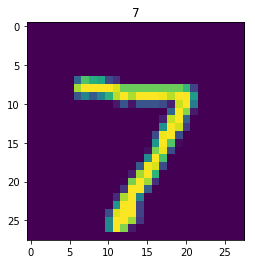

Predicted Value= 7 



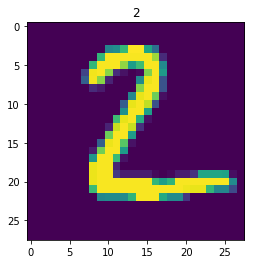

Predicted Value= 2 



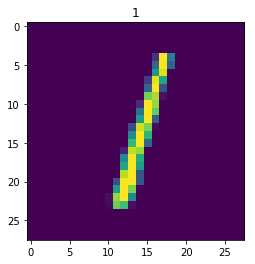

Predicted Value= 1 



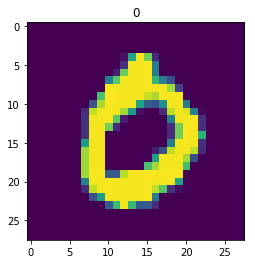

Predicted Value= 0 



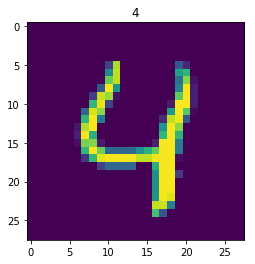

Predicted Value= 4 



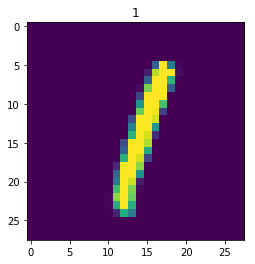

Predicted Value= 1 



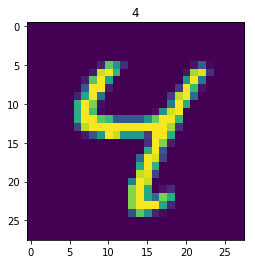

Predicted Value= 4 



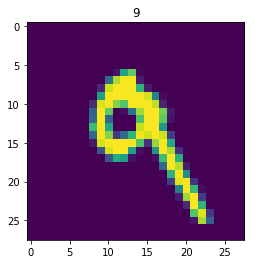

Predicted Value= 9 



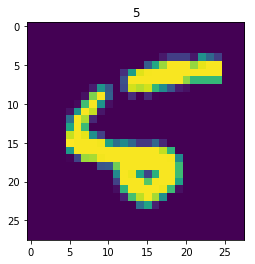

Predicted Value= 2 



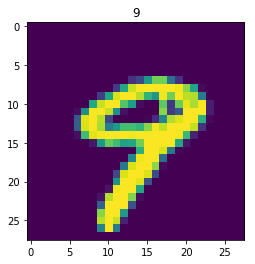

Predicted Value= 9 



In [15]:
for i in range(0,10):
    plt.imshow(Xtest[i].reshape(28,28))
    plt.title(ytest[i].argmax())
    plt.show()
    print("Predicted Value=", test_prediction[i].argmax(),"\n")

Displayed the first 10 images in test dataset to show the predictions. Note that it predicted the 5 as a 2!